Created on Sat Apr 19 01:27:14 2025

    Демонстрационный файл лабораторных работ по Информатике,

    студента: Никифорова О.В.
    группы: ЗИИИм-11

    каф. АСОиУ.

    Лабораторная работа 4, Основы Python
    Упражнение 1, Sympy.

@licence: GPL
@author: Никифорова О.В.

# Решение алгебраических уравнений разного вида символьно средствами sympy

### Подготовка

In [2]:
import sympy
from sympy import *
init_printing(use_unicode=True, wrap_line=True, no_global=True)
x, y, z = symbols('x y z')

### Создаём простейшее уравнение:

In [3]:
eq1 = Eq(y, x**2)
eq1

### Решаем простейшее уравнение:

In [4]:
solveset(eq1, x)  # Просто оборотим уравнение eq1

In [5]:
solveset(Eq((x-1)**2 - 4, 0), x)  # Находим, когда (x-1)**2 - 4 равен 0

In [6]:
solveset(Eq(sin(x), 0), x)

In [7]:
solve(Eq(sin(x), 0), check=False)

In [8]:
solveset(Eq(sin(x)*(x-1)**2 - 4, 0), x)

In [9]:
solveset(exp(x), x)

In [13]:
# Пример с большим полиномом:
from mpmath import *
myroots = polyroots([23, 1, 0, 0, 0, 0, 3], extraprec=20)
print(myroots)
print(myroots[5])  # Печатаем только реальный корень


[mpc(real='-0.62414011844396633', imag='0.35597352292460266'), mpc(real='-0.62414011844396633', imag='-0.35597352292460266'), mpc(real='0.6096423657595782', imag='0.35598219159943523'), mpc(real='0.6096423657595782', imag='-0.35598219159943523'), mpc(real='-0.0072413777503944681', imag='0.71195610102624796'), mpc(real='-0.0072413777503944681', imag='-0.71195610102624796')]
(-0.00724137775039447 - 0.711956101026248j)


# Решение линейных и нелинейных систем уравнений символьно средствами sympy

### Решаем системы уравнений:

In [14]:
linsolve([11*x + 3*y + 8*z - 4, x - y - z, x + z], (x, y, z))  # Система линейных алгебраических уравнений

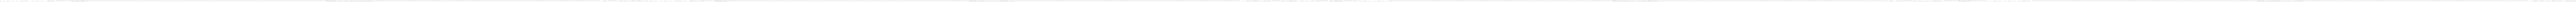

In [15]:
nonlinsolve([11*x**2 + 3*y**2 + 8*z - 4, x**2 - y - z, x + z], (x, y, z))  
# система нелинейных (полиномиальных) алгебраических уравнений (очень большая, не запускайте)

In [16]:
from sympy import *
# solve([sin(x + y), x + y], (x, y))  # тоже, но представлено в другом виде
nonlinsolve([sin(x + y), x + y], (x, y))  # Простая система с тригонометрией

In [17]:
nonlinsolve([1 / sqrt(x + y), sin(x) + y], (x, y))

# Символьное интегрирование ОДУ – часть 1

### Решение дифференциальных уравнений:

In [18]:
from sympy import symbols, Function, Eq, sin
f, g = symbols('f g', cls=Function)  # создание пустых функций f и g
print(f(x), g(x))

f(x) g(x)


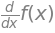

In [19]:
f(x).diff(x)  # дифференциал f(x)

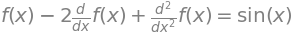

In [20]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))  
# Небольшое уравнение со специальной правой частью
diffeq

# Символьное интегрирование ОДУ – часть 2

In [23]:
from sympy import Derivative as D

solution = dsolve(D(f(x), x, x) - 2*D(f(x), x) + f(x) - sin(x))
print(solution)

Eq(f(x), (C1 + C2*x)*exp(x) + cos(x)/2)


In [24]:
print(ode_order(D(f(x), x, x) - 2*D(f(x), x) + f(x), f(x)))

2


In [25]:
print(classify_ode(D(f(x), x, x) - 2*D(f(x), x) + f(x)))

('nth_linear_constant_coeff_homogeneous', '2nd_power_series_ordinary')


/Users/ox/opt/anaconda3/lib/python3.8/site-packages/sympy/core/relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


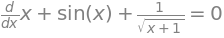

In [26]:
diff(Eq(1 / sqrt(x + 1) + sin(x) + x), x)  # дифференцирование уравнения по x


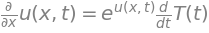

In [27]:
# Немного о работе с ДУ нескольких переменных
t = symbols('t')
u, X, T = map(Function, 'uXT')
equation = Eq(u(x,t).diff(x), E**u(x,t)*T(t).diff(t))  # Создание ДУ нескольких переменных
equation

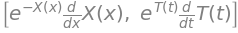

In [28]:
separated1 = pde_separate(equation, u(x,t), [X(x), T(t)], strategy='add')  # разделение функций стратегией 'add'
separated1


In [30]:
separated2 = pde_separate(equation, u(x,t), [X(x), T(t)], strategy='add')
print(separated2)


[exp(-X(x))*Derivative(X(x), x), exp(T(t))*Derivative(T(t), t)]


In [31]:
from sympy import Function, Eq, symbols, pdsolve

f = Function('f')
x, y = symbols('x y')
u = f(x, y)
ux = u.diff(x)
uy = u.diff(y)
equation2 = Eq(1 + (2*(ux/u)) + (3*(uy/u)))
solution = pdsolve(equation2)
solution

In [32]:
classify_pde(equation2)


('1st_linear_constant_coeff_homogeneous',)

# Символьное интегрирование систем ОДУ